In [1]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


Acurácia do modelo: 0.9035087719298246
Matriz de Confusão:
[[68  3]
 [ 8 35]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        71
           1       0.92      0.81      0.86        43

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



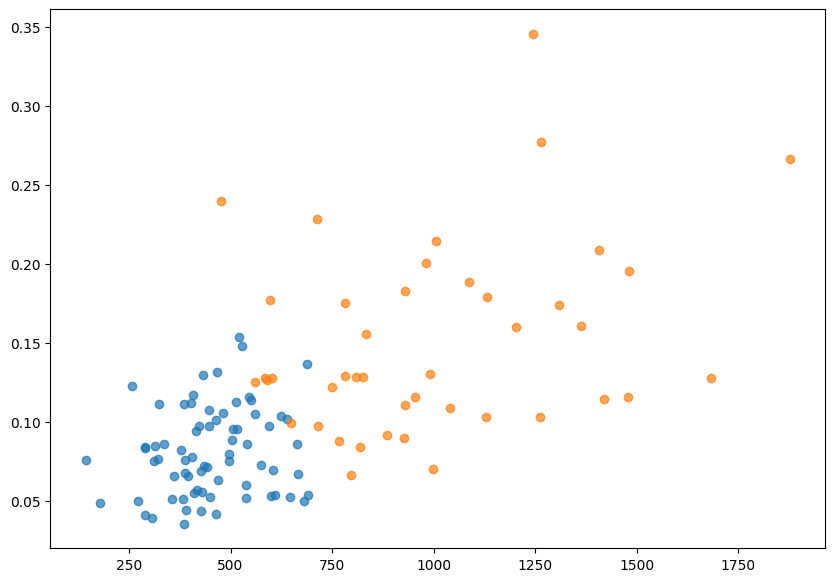

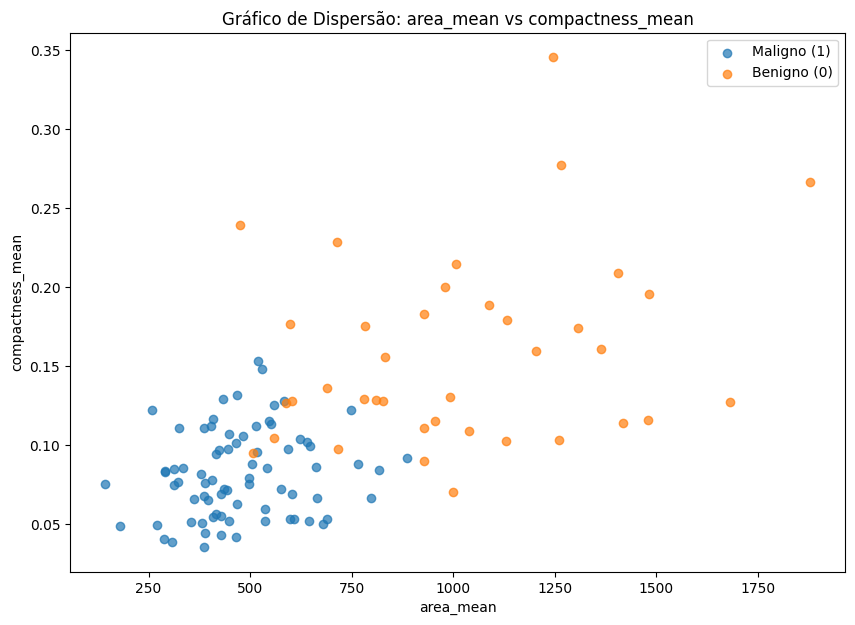

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

# Removendo a coluna 'id'
data = data.drop('id', axis=1)

# Convertendo a coluna 'diagnosis' para valores numéricos (0 para benigno, 1 para maligno)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Escolhendo as colunas corretas para o gráfico de dispersão
feature1 = "area_mean"
feature2 = "compactness_mean"

# Verificando se as colunas estão presentes no DataFrame
if feature1 not in data.columns or feature2 not in data.columns:
    raise KeyError(f"As colunas {feature1} e {feature2} não estão presentes no DataFrame.")

# Separando as features (X) e o alvo (y)
X = data[[feature1, feature2]].values
y = data['diagnosis'].values

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um imputer
imputer = SimpleImputer(strategy='mean')

# Preenchendo os valores ausentes no conjunto de treino
X_train = imputer.fit_transform(X_train)

# Preenchendo os valores ausentes no conjunto de teste
X_test = imputer.transform(X_test)

# Inicializando o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Exibindo a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n{conf_matrix}')

# Exibindo o relatório de classificação
class_report = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{class_report}')

# Plotando o gráfico de dispersão com rótulos personalizados
plt.figure(figsize=(10, 7))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='Maligno (1)', alpha=0.7)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='Benigno (0)', alpha=0.7)

# Plotando o gráfico de dispersão das variaveis teste
plt.figure(figsize=(10, 7))
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], label='Maligno (1)', alpha=0.7)
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], label='Benigno (0)', alpha=0.7)

plt.title(f'Gráfico de Dispersão: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()
